In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('audi.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<Axes: >

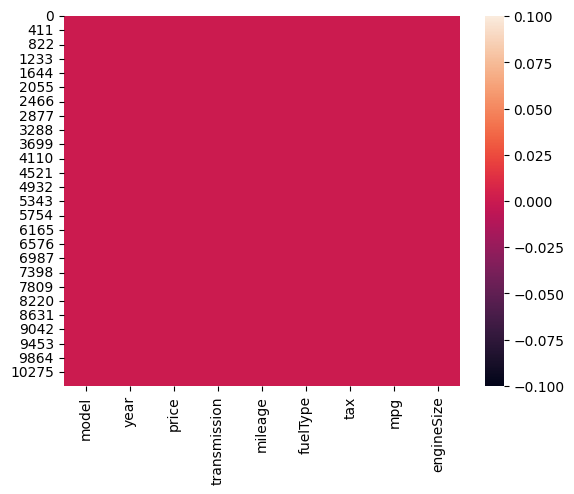

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


<Axes: >

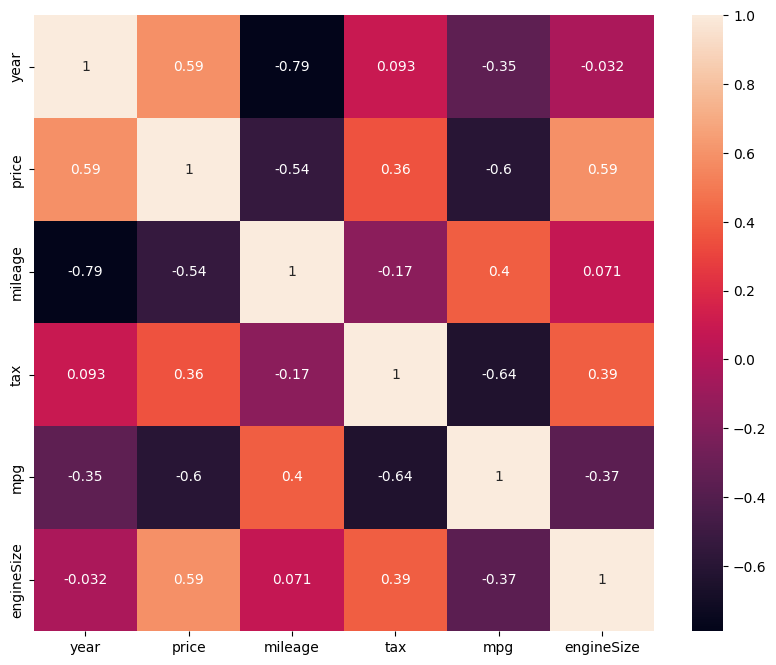

In [8]:
df= df.select_dtypes(exclude=[object])
df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
df = pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [10]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'numberOfCars'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ' A2'),
  Text(1, 0, ' RS7'),
  Text(2, 0, ' S5'),
  Text(3, 0, ' S8'),
  Text(4, 0, ' SQ7'),
  Text(5, 0, ' S4'),
  Text(6, 0, ' SQ5'),
  Text(7, 0, ' S3'),
  Text(8, 0, ' R8'),
  Text(9, 0, ' RS5'),
  Text(10, 0, ' RS4'),
  Text(11, 0, ' RS3'),
  Text(12, 0, ' RS6'),
  Text(13, 0, ' Q8'),
  Text(14, 0, ' A8'),
  Text(15, 0, ' A7'),
  Text(16, 0, ' TT'),
  Text(17, 0, ' Q7'),
  Text(18, 0, ' A6'),
  Text(19, 0, ' Q2'),
  Text(20, 0, ' Q5'),
  Text(21, 0, ' A5'),
  Text(22, 0, ' A1'),
  Text(23, 0, ' A4'),
  Text(24, 0, ' Q3'),
  Text(25, 0, ' A3')])

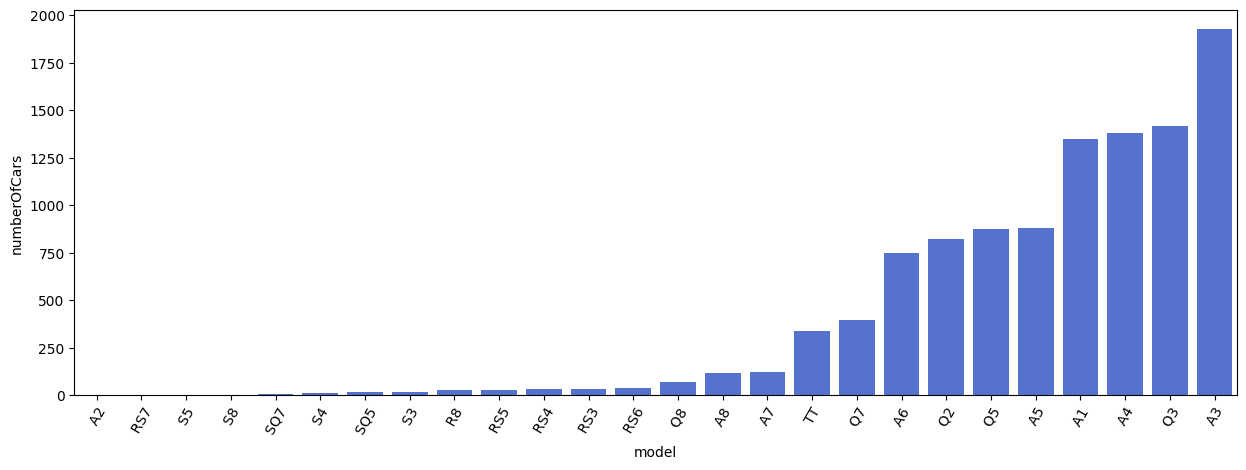

In [11]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [12]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax': 'count'})

<Axes: xlabel='engineSize', ylabel='count'>

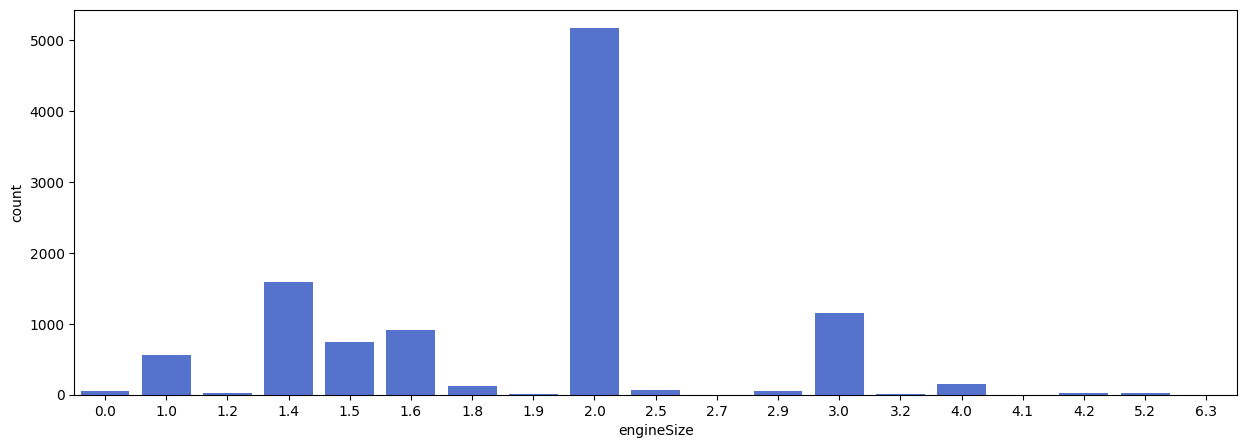

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

<ipython-input-14-8f81938ee51d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

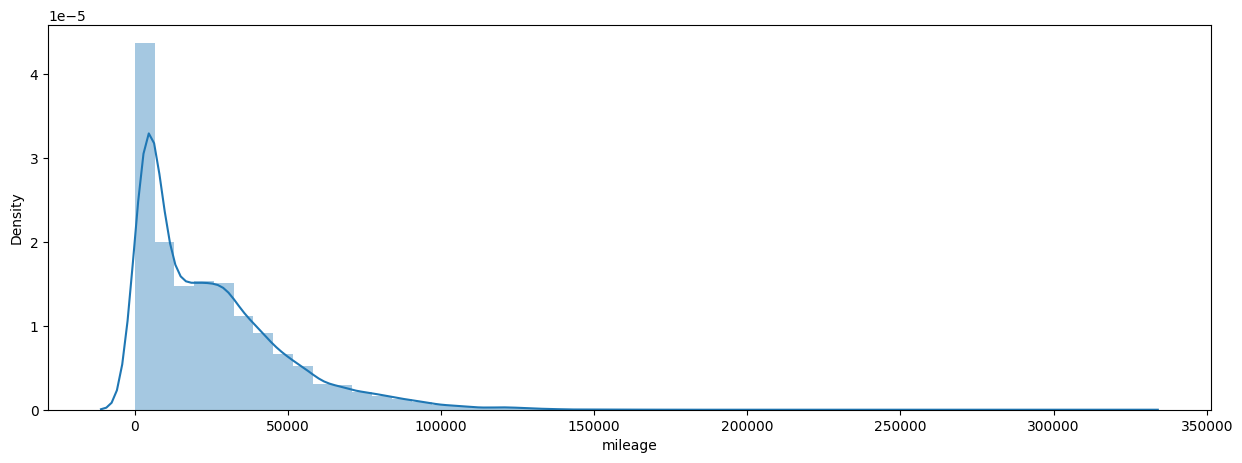

In [14]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

<ipython-input-15-120711ea5836>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

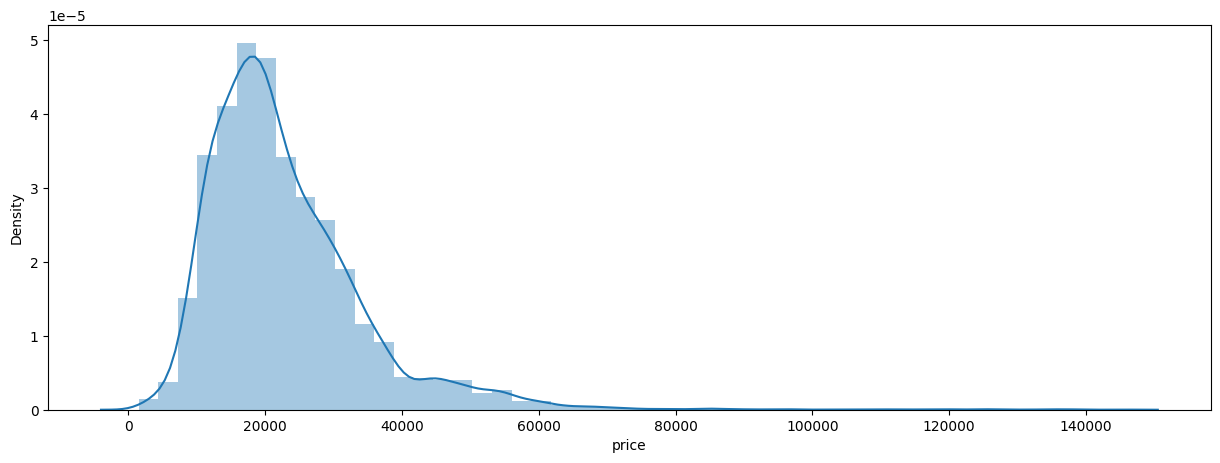

In [15]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [16]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10668, 5), (10668,))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=70)
y_test.shape

(2667,)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [21]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7594637694494434


In [22]:
input_data = np.array([[2022,6000,145,55.4,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EURO :', prediction)

Estimasi harga mobil dalam EURO : [34106.21822789]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
import pickle

In [24]:
filename = 'estimasi_mobil_audi.sav'
pickle.dump(lr, open(filename, 'wb'))